Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


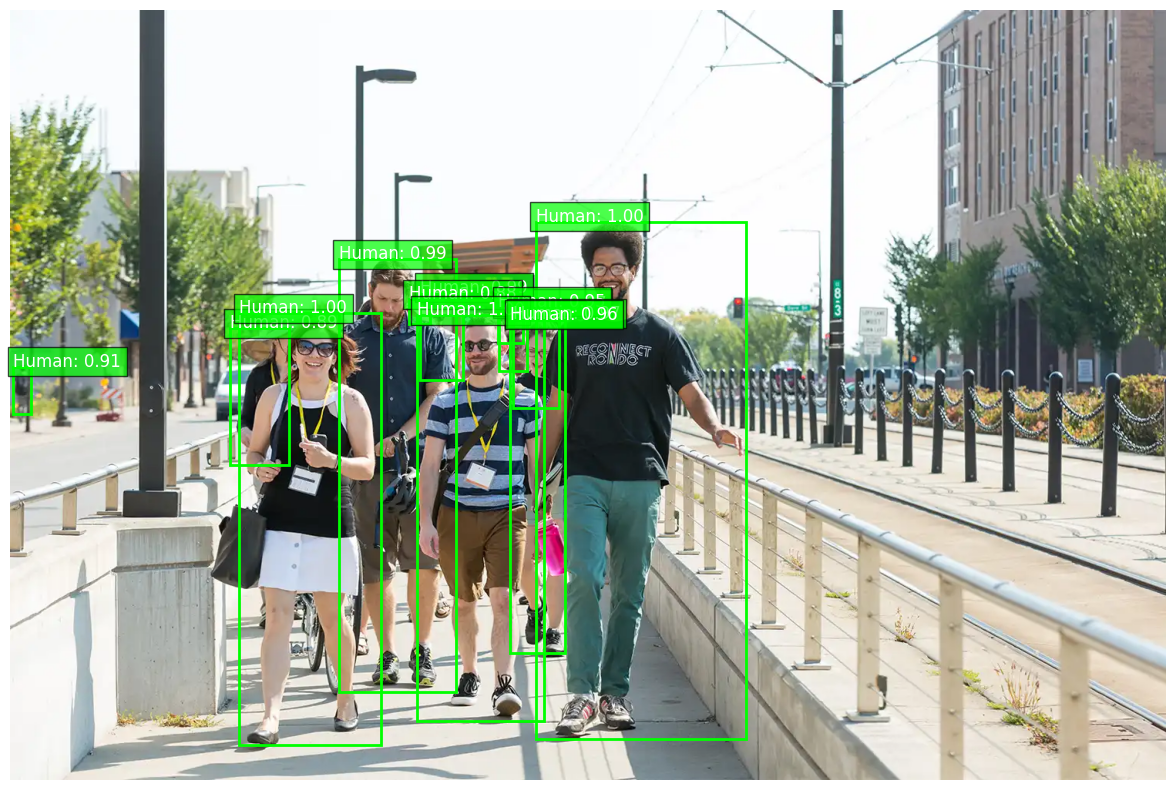

In [ ]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

def detect_humans(image_path, confidence=0.85):
    image = Image.open(image_path)
    inputs = processor(images=image, return_tensors="pt")
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    results = processor.post_process_object_detection(
        outputs, 
        target_sizes=torch.tensor([image.size[::-1]]),
        threshold=confidence
    )[0]
    
    human_indices = [i for i, label in enumerate(results["labels"]) 
                    if label.item() == 1]
    
    plt.figure(figsize=(16, 10))
    plt.imshow(image)
    ax = plt.gca()
    
    for idx in human_indices:
        box = results["boxes"][idx].tolist()
        score = results["scores"][idx].item()
        
        x, y, w, h = box[0], box[1], box[2]-box[0], box[3]-box[1]
        rect = patches.Rectangle(
            (x, y), w, h, 
            linewidth=2, 
            edgecolor='lime', 
            facecolor='none'
        )
        ax.add_patch(rect)
        
        plt.text(
            x, y, 
            f"Human: {score:.2f}", 
            color='white', 
            fontsize=12,
            bbox=dict(facecolor='lime', alpha=0.7)
        )
    
    plt.axis('off')
    plt.show()

detect_humans("test_image.jpg")  


In [ ]:
import cv2


cap = cv2.VideoCapture("my_video2.mp4")
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("results.mp4", fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    inputs = processor(images=frame, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    
    target_sizes = torch.tensor([frame.shape[:2]])
    results = processor.post_process_object_detection(
        outputs, 
        target_sizes=target_sizes,
        threshold=0.7
    )[0]
    
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        if label.item() == 1:  # 1 is the label for humans
            box = [int(i) for i in box.tolist()]
            cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
            cv2.putText(frame, f"Human: {score:.2f}", 
                        (box[0], box[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [2]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

# Load model and processor
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

# Load and preprocess an image
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
inputs = processor(images=image, return_tensors="pt")

# Forward pass
with torch.no_grad():
    outputs = model(**inputs, output_hidden_states=True)

# Extract detection embeddings: shape [batch_size, num_queries, hidden_dim]
detection_embeddings = outputs.decoder_hidden_states[-1]  # Last decoder layer output

print("Detection embeddings shape:", detection_embeddings.shape)


C:\Users\SzymonWoźniak(272471\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initia

Detection embeddings shape: torch.Size([1, 100, 256])


In [3]:
detection_embeddings.shape

torch.Size([1, 100, 256])

In [4]:
detection_embeddings

tensor([[[ 6.1599e-02, -5.1461e-01, -4.0323e-01,  ..., -6.8609e-01,
           2.4458e+00,  1.1229e-01],
         [-7.6286e-01, -4.9343e-01, -1.7153e+00,  ..., -2.6337e-01,
           3.2548e+00,  6.1374e-01],
         [-4.7675e-01, -6.4030e-01, -7.8257e-01,  ..., -1.2225e+00,
           2.6471e+00, -1.6341e-04],
         ...,
         [-4.5716e-01, -9.5351e-01, -5.3540e-01,  ..., -4.4069e-01,
           2.2883e+00, -3.9115e-02],
         [-5.3162e-01, -1.8551e+00, -1.4860e+00,  ...,  2.8946e-01,
           2.2507e+00,  7.3355e-01],
         [-9.1941e-01, -1.9131e-02, -1.5155e+00,  ..., -3.7177e-01,
           3.2195e+00,  5.1125e-01]]])

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


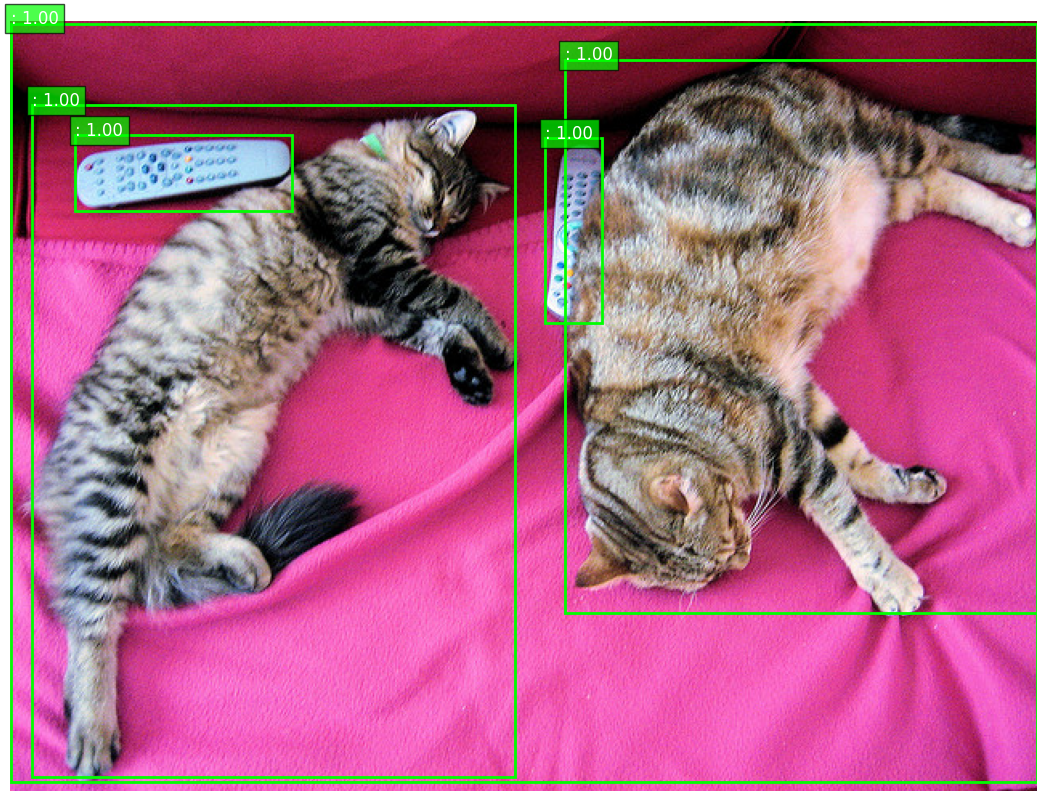

In [ ]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

def detect_humans(image_path, confidence=0.85):
    url = "http://images.cocodataset.org/val2017/000000039769.jpg"
    image = Image.open(requests.get(url, stream=True).raw)
    inputs = processor(images=image, return_tensors="pt")
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    results = processor.post_process_object_detection(
        outputs, 
        target_sizes=torch.tensor([image.size[::-1]]),
        threshold=confidence
    )[0]
    
    human_indices = [i for i, label in enumerate(results["labels"]) 
                    if label.item()]
    
    plt.figure(figsize=(16, 10))
    plt.imshow(image)
    ax = plt.gca()
    
    for idx in human_indices:
        box = results["boxes"][idx].tolist()
        score = results["scores"][idx].item()
        
        x, y, w, h = box[0], box[1], box[2]-box[0], box[3]-box[1]
        rect = patches.Rectangle(
            (x, y), w, h, 
            linewidth=2, 
            edgecolor='lime', 
            facecolor='none'
        )
        ax.add_patch(rect)
        
        plt.text(
            x, y, 
            f": {score:.2f}", 
            color='white', 
            fontsize=12,
            bbox=dict(facecolor='lime', alpha=0.7)
        )
    
    plt.axis('off')
    plt.show()

detect_humans("test_image.jpg")  